# Creating the network

Creating the network .gml file from the column given

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import ast

In [3]:
df_zip = pd.read_csv("../zipcode_by_state.csv")
df_zip["Zip Min"].astype(int)
df_zip["Zip Min"].astype(int)
df_zip.head()

,ID,State Name,ST,Zip Min,Zip Max
0,44,Puerto Rico,PR,0,0
1,26,Massachusetts,MA,1001,2791
2,45,Rhode Island,RI,2801,2940
3,34,New Hampshire,NH,3031,3897
4,24,Maine,ME,3901,4992


In [4]:
df_postings = pd.read_csv("../data/postings_parsed.csv")
df_postings_shortened = df_postings.head(100)
df_postings_shortened.head()

,job_id,company_name,description,skills_desc,zip_code,skills
0,921716,Corcoran Sawyer Smith,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,8540.0,['planning']
1,1829192,NaN,"At Aspen Therapy and Wellness , we are committ...",NaN,80521.0,"['planning', 'communication', 'interpersonal']"
2,10998357,The National Exemplar,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,45202.0,"['organization', 'teamwork', 'communication']"
3,23221523,"Abrams Fensterman, LLP",Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,11040.0,"['problem-solving', 'planning', 'communication..."
4,35982263,NaN,Looking for HVAC service tech with experience ...,NaN,52601.0,[]


In [25]:
def assign_state(zipcode):
    # Find the range that the zipcode falls into
    state_row = df_zip[(df_zip['Zip Min'] <= zipcode)]
    
    # Return the state if a match is found, otherwise return None
    if not state_row.empty:
        return state_row['ST'].iloc[-1]
    else:
        return None

In [26]:
assign_state(1500)

'MA'

In [30]:
df_postings_shortened['state'] = df_postings_shortened['zip_code'].apply(assign_state)
df_postings_shortened.head()

/tmp/ipykernel_19044/293009749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postings_shortened['state'] = df_postings_shortened['zip_code'].apply(assign_state)


,job_id,company_name,description,skills_desc,zip_code,skills,State,state
0,921716,Corcoran Sawyer Smith,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,8540.0,['planning'],NJ,NJ
1,1829192,NaN,"At Aspen Therapy and Wellness , we are committ...",NaN,80521.0,"['planning', 'communication', 'interpersonal']",CO,CO
2,10998357,The National Exemplar,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,45202.0,"['organization', 'teamwork', 'communication']",OH,OH
3,23221523,"Abrams Fensterman, LLP",Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,11040.0,"['problem-solving', 'planning', 'communication...",NY,NY
4,35982263,NaN,Looking for HVAC service tech with experience ...,NaN,52601.0,[],IA,IA


In [29]:
all_states = df_postings_shortened["state"].unique()

In [35]:
# Creating a network graph
G = nx.Graph()

for state in all_states:
    state_row = df_postings_shortened[df_postings_shortened["state"] == state]
    # Add nodes and edges for every combination of skills in the list
    for job1, job2 in combinations(state_row['job_id'], 2):
        G.add_edge(job1, job2, weight=1)

In [41]:
# Export the graph to a GML file
nx.write_gml(G, '../graphs/location_graph.gml')

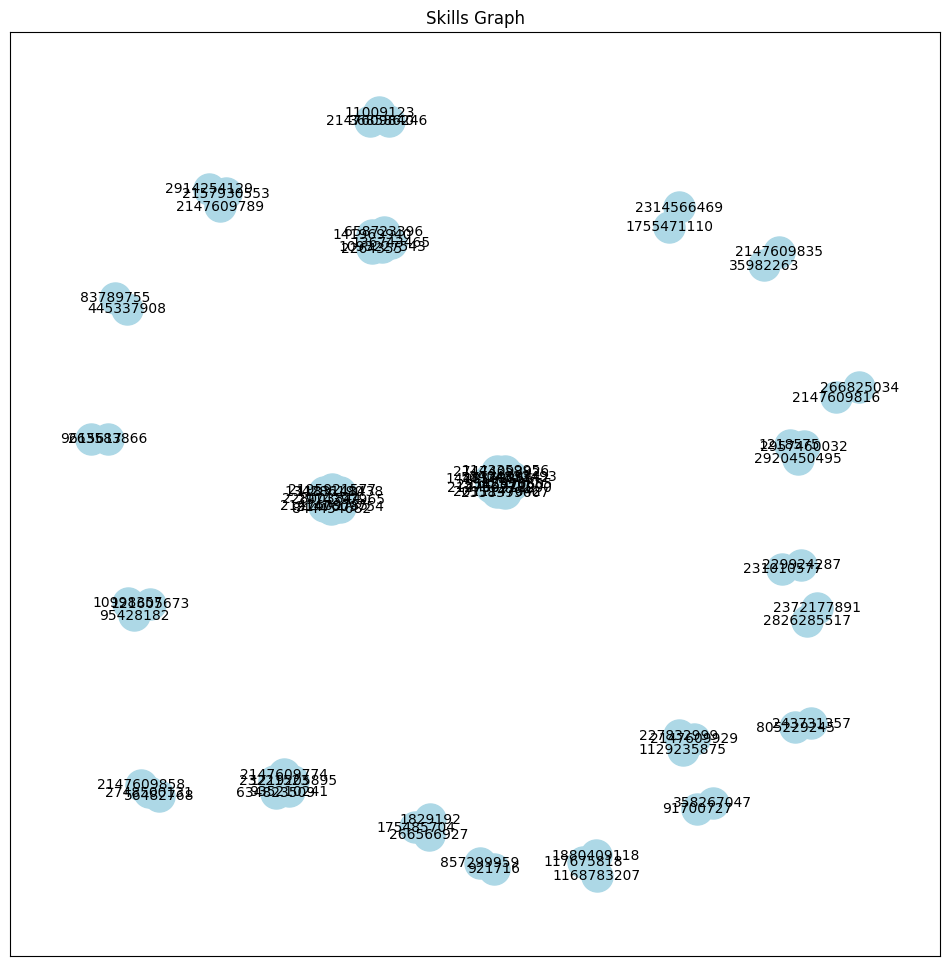

In [36]:
# Read the GML File and plot the graph
plt.figure(figsize=(12, 12))  # Set the figure size

# Draw the graph with a spring layout (which tries to position nodes in a visually pleasing way)
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.5, edge_color='gray')

# Draw the labels for each node
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Display the plot
plt.title("Skills Graph")
plt.show()

# Average Degree

In [37]:
# Printing the useful information of the graphs
G = G.to_undirected()

# Average degree
degrees = []
for node, deg in G.degree():
    degrees.append(deg)
average_degree = sum(degrees) / len(degrees)
print(f"Average degree of the graph: {average_degree}")

Average degree of the graph: 4.0


# Clustering Coefficient
### Average clustering coefficient
<What does the average clustering coefficient represent? >

### Global clustering coefficient
<What does the average clustering coefficient represent? >

In [38]:
# 1. Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

# 2. Global clustering coefficient (Transitivity)
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering}")

Average Clustering Coefficient: 0.7297297297297297
Global Clustering Coefficient (Transitivity): 1.0


# Nodes with highest degree

In [39]:
# Getting the most connected nodes

nodes_with_degrees = G.degree()

sorted_nodes = sorted(nodes_with_degrees, key=lambda x: x[1], reverse=True)

# Get the top 10 nodes with the highest degree
top_10_nodes = sorted_nodes[:10]

# Print the result
for node, degree in top_10_nodes:
    print(f"Node: {node}, Degree: {degree}")

Node: 112576855, Degree: 11
Node: 56924323, Degree: 11
Node: 1143359956, Degree: 11
Node: 1448163866, Degree: 11
Node: 2011147642, Degree: 11
Node: 2147609712, Degree: 11
Node: 2404832493, Degree: 11
Node: 2558399667, Degree: 11
Node: 2737009242, Degree: 11
Node: 2747409392, Degree: 11


# Plotting the graphs

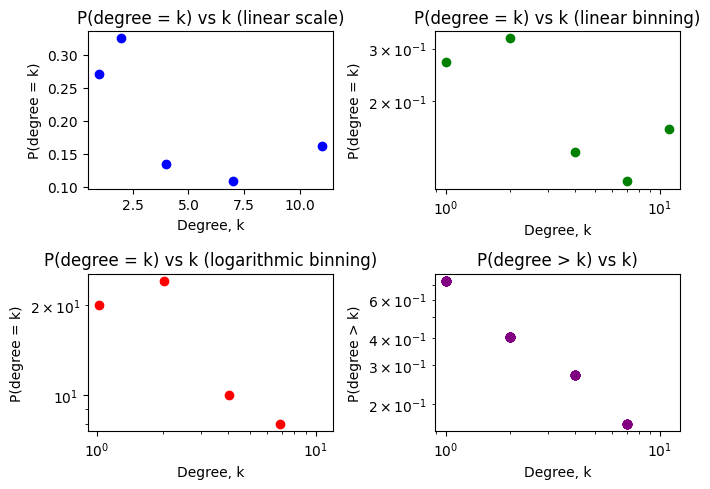

In [40]:
k_values, P_k = np.unique(degrees, return_counts=True)
P_k = P_k / sum(P_k)

# Creating subplot for the four different plots
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

# === 1. P(degree = k) as a function of k in linear scale ===
# This is equivalent to just plotting the graphs
axs[0, 0].scatter(k_values, P_k, color='blue')
axs[0, 0].set_xlabel('Degree, k')
axs[0, 0].set_ylabel('P(degree = k)')
axs[0, 0].set_title('P(degree = k) vs k (linear scale)')

# === 2. P(degree = k) in a log-log scale with linear binning
axs[0, 1].scatter(k_values, P_k, color='green')
# Allows me to log the x and the y graphs
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Degree, k')
axs[0, 1].set_ylabel('P(degree = k)')
axs[0, 1].set_title('P(degree = k) vs k (linear binning)')

# === 3. P(degree = k) in a log-log scale with log binning (x-axis)

# Creating bins on a logarithmic scale.
# This means that the width of the spaces increases
k_bins = np.logspace(np.log10(min(k_values)), np.log10(max(k_values)))
# hist: Counts the degrees within each bin
# bin_edges: Boundaries of each bin, so we only want to plot the middle point
hist, bin_edges = np.histogram(degrees, bins=k_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

axs[1, 0].scatter(bin_centers, hist, color='red')
# Allows me to log the x and the y graphs
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Degree, k')
axs[1, 0].set_ylabel('P(degree = k)')
axs[1, 0].set_title('P(degree = k) vs k (logarithmic binning)')

# === 4. P(degree = k) in a log-log scale with log binning (x-axis)
# Sort degrees in descending order
sorted_degrees = np.sort(degrees)[::-1]
# Calculate the CCDF: P(degree > k) for each degree
# np.sum(sorted_degrees > k) is the CCDF.
ccdf = np.array([np.sum(sorted_degrees > k)
                for k in sorted_degrees]) / len(degrees)

# Plot the CCDF
axs[1, 1].scatter(sorted_degrees, ccdf, color='purple')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Degree, k')
axs[1, 1].set_ylabel('P(degree > k)')
axs[1, 1].set_title('P(degree > k) vs k)')

plt.tight_layout()
plt.show()
